In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
life_expectancy = pd.read_csv('Life Expectancy Data.csv')
coordinates = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')

In [4]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life_expectancy['Status_1'] = np.NAN
life_expectancy['Status_1'] = (life_expectancy['Status'] == 'Developed').astype(int)

In [6]:
life_expectancy.drop('Status',axis = 1,inplace=True)
life_expectancy.rename(columns= {'Country':'country','Diphtheria ':'diphtheria',' BMI ':'bmi','Hepatitis B':'hepB',' HIV/AIDS':'hiv_aids','Total expenditure':'total_expenditure','under-five deaths ':'deaths_U5','infant deaths':'infant_deaths','Adult Mortality':'adult_mortality','Status_1' : 'Status', 'Income composition of resources':'income_composition','Life expectancy ' : 'life_expectancy', 'percentage expenditure' : 'expenditure_%',' thinness  1-19 years' : 'thinness_1_19',' thinness 5-9 years' : 'thinness_5_9'},inplace=True)


In [7]:
life_expectancy

,country,Year,life_expectancy,adult_mortality,infant_deaths,Alcohol,expenditure_%,hepB,Measles,bmi,deaths_U5,Polio,total_expenditure,diphtheria,hiv_aids,GDP,Population,thinness_1_19,thinness_5_9,income_composition,Schooling,Status
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0


In [8]:
life_expectancy.columns

Index(['country', 'Year', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'Alcohol', 'expenditure_%', 'hepB', 'Measles ', 'bmi',
       'deaths_U5', 'Polio', 'total_expenditure', 'diphtheria', 'hiv_aids',
       'GDP', 'Population', 'thinness_1_19', 'thinness_5_9',
       'income_composition', 'Schooling', 'Status'],
      dtype='object')

In [9]:
life_expectancy.isna().sum()

country                 0
Year                    0
life_expectancy        10
adult_mortality        10
infant_deaths           0
Alcohol               194
expenditure_%           0
hepB                  553
Measles                 0
bmi                    34
deaths_U5               0
Polio                  19
total_expenditure     226
diphtheria             19
hiv_aids                0
GDP                   448
Population            652
thinness_1_19          34
thinness_5_9           34
income_composition    167
Schooling             163
Status                  0
dtype: int64

In [10]:
life_expectancy.life_expectancy.fillna(life_expectancy.life_expectancy.mean(),inplace=True)
life_expectancy.adult_mortality.fillna(life_expectancy.adult_mortality.mean(),inplace=True)
life_expectancy.Alcohol.fillna(life_expectancy.Alcohol.mean(),inplace=True)
life_expectancy.hepB.fillna(life_expectancy.hepB.mean(),inplace= True)
life_expectancy.bmi.fillna(life_expectancy.bmi.mean(),inplace=True)
life_expectancy.Polio.fillna(life_expectancy.Polio.mean(),inplace=True)
life_expectancy.total_expenditure.fillna(life_expectancy.total_expenditure.mean(),inplace=True)
life_expectancy.diphtheria.fillna(life_expectancy.bmi.mean(),inplace=True)
life_expectancy.GDP.fillna(life_expectancy.GDP.mean(),inplace=True)
life_expectancy.Population.fillna(life_expectancy.Population.mean(),inplace=True)
life_expectancy.thinness_1_19.fillna(life_expectancy.thinness_1_19.mean(),inplace=True)
life_expectancy.thinness_5_9.fillna(life_expectancy.thinness_5_9.mean(),inplace=True)
life_expectancy.income_composition.fillna(life_expectancy.income_composition.mean(),inplace=True)
life_expectancy.Schooling.fillna(life_expectancy.Schooling.mean(),inplace=True)

In [11]:
life_expectancy.isna().sum()

country               0
Year                  0
life_expectancy       0
adult_mortality       0
infant_deaths         0
Alcohol               0
expenditure_%         0
hepB                  0
Measles               0
bmi                   0
deaths_U5             0
Polio                 0
total_expenditure     0
diphtheria            0
hiv_aids              0
GDP                   0
Population            0
thinness_1_19         0
thinness_5_9          0
income_composition    0
Schooling             0
Status                0
dtype: int64

In [12]:
life_expectancy[life_expectancy.duplicated()]

,country,Year,life_expectancy,adult_mortality,infant_deaths,Alcohol,expenditure_%,hepB,Measles,bmi,deaths_U5,Polio,total_expenditure,diphtheria,hiv_aids,GDP,Population,thinness_1_19,thinness_5_9,income_composition,Schooling,Status


In [13]:
life_expectancy = life_expectancy.merge(coordinates.loc[:,'country_code' : 'country'], how='left', on='country')

In [14]:
URL = "https://en.wikipedia.org/wiki/Tobacco_consumption_by_country"
page = requests.get(URL)

soup = BeautifulSoup(page.text, "html.parser")

table = soup.find_all('table')[1]#.find_all('td')#.find_all('a')[0].string

final_data = []
for a in table.find_all('tbody'):
    rows = a.find_all('td')
    for row in rows:
        final_data.append(row.text.strip().strip('*'))
        
countries = []
cigarettes = []

countries.append(final_data[::2])
cigarettes.append(final_data[1::2])
cigarettes = cigarettes[0]
countries = countries[0]

countries_ = []
cigarettes_ = []
for a in countries:
    countries_.append(a.encode("ascii", "ignore").decode())
for a in cigarettes:
    cigarettes_.append(a.encode("ascii", "ignore").decode())
    
countries = countries_.copy()
cigarettes = cigarettes_.copy()

del(countries_)
del(cigarettes_)

for a in range(len(cigarettes)):
    cigarettes[a] = float(cigarettes[a].replace(',',''))

data_tuples = list(zip(countries,cigarettes))

pd.DataFrame(data_tuples,columns=['country','Cigarettes_per_day']).set_index('country').to_csv('cigarettes.csv')        

In [15]:
URL = "https://www.numbeo.com/crime/rankings_by_country.jsp"
page = requests.get(URL)

soup = BeautifulSoup(page.text, "html.parser")

table = soup.find_all('table')[1]#.find_all('td')#.find_all('a')[0].string

final_data = []
for a in table.find_all('tbody'):
    rows = a.find_all('td')
    for row in rows:
        final_data.append(row.text.strip().strip('*'))
        
final_data = [ele for ele in final_data if ele.strip()]

Countries = final_data[::3]
crime_index = final_data[1::3]
safety_index = final_data[2::3]

crime_index = list(map(float, crime_index))
safety_index = list(map(float, safety_index))
data_tuples = list(zip(Countries,crime_index,safety_index))

pd.DataFrame(data_tuples, columns=['country','Crime_Index','Safety_Index']).set_index('country').to_csv('crime_safety_index.csv')

In [16]:
cigar_df = pd.read_csv('cigarettes.csv')
crime_safety = pd.read_csv('crime_safety_index.csv')

In [17]:
cigar_df.country.replace('Bolivia','Bolivia (Plurinational State of)',inplace=True)
cigar_df.country.replace('South Korea','Republic of Korea',inplace=True)
cigar_df.country.replace('Moldova','Republic of Moldova',inplace=True)
cigar_df.country.replace('Russia','Russian Federation',inplace=True)
cigar_df.country.replace('Syria','Syrian Arab Republic',inplace=True)
cigar_df.country.replace('North Macedonia','The former Yugoslav republic of Macedonia',inplace=True)
cigar_df.country.replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland',inplace=True)
cigar_df.country.replace('Tanzania','United Republic of Tanzania',inplace=True)
cigar_df.country.replace('United States','United States of America',inplace=True)
cigar_df.country.replace('Venezuela','Venezuela (Bolivarian Republic of)',inplace=True)
crime_safety.country.replace('Bolivia','Bolivia (Plurinational State of)',inplace=True)
crime_safety.country.replace('South Korea','Republic of Korea',inplace=True)
crime_safety.country.replace('Moldova','Republic of Moldova',inplace=True)
crime_safety.country.replace('Russia','Russian Federation',inplace=True)
crime_safety.country.replace('Syria','Syrian Arab Republic',inplace=True)
crime_safety.country.replace('North Macedonia','The former Yugoslav republic of Macedonia',inplace=True)
crime_safety.country.replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland',inplace=True)
crime_safety.country.replace('Tanzania','United Republic of Tanzania',inplace=True)
crime_safety.country.replace('United States','United States of America',inplace=True)
crime_safety.country.replace('Venezuela','Venezuela (Bolivarian Republic of)',inplace=True)
crime_safety.country.replace('Iran','Iran (Islamic Republic of)',inplace=True)
life_expectancy.country.replace('Viet Nam','Vietnam',inplace = True)

In [18]:
life_expectancy = life_expectancy.merge(cigar_df,on='country',how='left')
life_expectancy = life_expectancy.merge(crime_safety, on='country', how = 'left' )

In [19]:
life_expectancy

,country,Year,life_expectancy,adult_mortality,infant_deaths,Alcohol,expenditure_%,hepB,Measles,bmi,deaths_U5,Polio,total_expenditure,diphtheria,hiv_aids,GDP,Population,thinness_1_19,thinness_5_9,income_composition,Schooling,Status,country_code,latitude,longitude,Cigarettes_per_day,Crime_Index,Safety_Index
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,AF,33.939110,67.709953,311.6,76.31,23.69
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,AF,33.939110,67.709953,311.6,76.31,23.69
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,AF,33.939110,67.709953,311.6,76.31,23.69
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,AF,33.939110,67.709953,311.6,76.31,23.69
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,AF,33.939110,67.709953,311.6,76.31,23.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,ZW,-19.015438,29.154857,122.9,59.30,40.70
2934,Zimbabwe,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,ZW,-19.015438,29.154857,122.9,59.30,40.70
2935,Zimbabwe,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,ZW,-19.015438,29.154857,122.9,59.30,40.70
2936,Zimbabwe,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,ZW,-19.015438,29.154857,122.9,59.30,40.70


In [20]:
life_expectancy.Crime_Index.fillna(life_expectancy.Crime_Index.mean(),inplace=True)
life_expectancy.Safety_Index.fillna(life_expectancy.Safety_Index.mean(),inplace=True)

In [21]:
life_expectancy.country.nunique()

193

### Clean and merge Depression dataset

In [22]:
depression_df = pd.read_csv('number-with-depression-by-country.csv')

In [23]:
# drop the rows whose timeline were not between 2000-2015
depression_df.drop(depression_df.Year[(depression_df.Year < 2000) | (depression_df.Year > 2015)].index, inplace=True)

In [24]:
# Rename the columns
depression_df.rename(columns = {'Number':'Depression_Population'}, inplace = True)

In [25]:
# Convert the population into integer(calculated by growth rate each year)
depression_df['Depression_Population'] = depression_df['Depression_Population'].astype(int)

In [26]:
depression_df.head()

,country,Year,Depression_Population
10,Afghanistan,2000,501129
11,Afghanistan,2001,506530
12,Afghanistan,2002,537767
13,Afghanistan,2003,573188
14,Afghanistan,2004,590949


In [27]:
depression_df.country.replace('Bolivia', 'Bolivia (Plurinational State of)',inplace=True)
depression_df.country.replace('Brunei', 'Brunei Darussalam',inplace=True)
depression_df.country.replace('Iran','Iran (Islamic Republic of)',inplace=True)
depression_df.country.replace('Laos','Lao People\'s Democratic Republic',inplace=True)
depression_df.country.replace('Micronesia (country)','Micronesia (Federated States of)',inplace=True)
depression_df.country.replace('Moldova','Republic of Moldova',inplace=True)
depression_df.country.replace('Russia','Russian Federation',inplace=True)
depression_df.country.replace('Syria','Syrian Arab Republic',inplace=True)
depression_df.country.replace('North Macedonia','The former Yugoslav republic of Macedonia',inplace=True)
depression_df.country.replace('Timor','Timor-Leste',inplace=True)
depression_df.country.replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland',inplace=True)
depression_df.country.replace('Tanzania','United Republic of Tanzania',inplace=True)
depression_df.country.replace('United States','United States of America',inplace=True)
depression_df.country.replace('Venezuela','Venezuela (Bolivarian Republic of)',inplace=True)
depression_df.country.replace('South Korea','Republic of Korea',inplace=True)
depression_df.country.replace('North Korea','Democratic People\'s Republic of Korea',inplace=True)

In [28]:
# Merge the dataset
life_expectancy = life_expectancy.merge(depression_df,how='left')

In [29]:
life_expectancy.country.nunique()

193

In [30]:
life_expectancy[life_expectancy.Depression_Population.isna()].country.unique()

array(["Côte d'Ivoire", 'Cabo Verde', 'Cook Islands',
       'Democratic Republic of the Congo', 'Monaco', 'Nauru', 'Niue',
       'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Swaziland',
       'Tuvalu'], dtype=object)

In [31]:
# Drop NaN from the columns
life_expectancy.dropna(how='any',subset=['Depression_Population'],inplace=True)
life_expectancy['Depression_Population'] = life_expectancy['Depression_Population'].astype(int)

In [32]:
life_expectancy.country.nunique()

181

### Clean and merge Cannabis Legalization dataset

In [33]:
cannabis_df = pd.read_csv('cannabis_legalization.csv')

In [34]:
cannabis_df

,Country/Territory,Recreational,Medical
0,Afghanistan,Illegal,Illegal
1,Albania,Illegal,Illegal
2,Algeria,Illegal,Illegal
3,Andorra,Illegal,Illegal
4,Angola,Illegal,Illegal
...,...,...,...
201,Venezuela,Illegal,Illegal
202,Vietnam,Illegal,Illegal
203,Yemen,Illegal,Illegal
204,Zambia,Illegal,Legal


In [35]:
# Clean the Recreational columns in dataset
cannabis_df.Recreational[cannabis_df.Recreational.str.contains("Decriminalized|decriminalized")] = 'Legal'
cannabis_df.Recreational[cannabis_df.Recreational.str.contains("Legal")] = 'Legal'
cannabis_df.Recreational[cannabis_df.Recreational.str.contains("Illegal")] = 'Illegal'
cannabis_df.drop(cannabis_df[cannabis_df["Country/Territory"] == "Country/Territory"].index, inplace=True)
cannabis_df.drop(cannabis_df[cannabis_df["Recreational"] == "Un\xadknown"].index, inplace=True)


In [36]:
# Clean the Medical columns in dataset
# Use loc[] method to prevent the chained indexing warning in this part
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str.contains("Decriminalized|decriminalized")] = 'Legal'
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str.contains("Legal")] = 'Legal'
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str.contains("Illegal")] = 'Illegal'
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str.contains("Illegal")] = 'Illegal'
cannabis_df.loc[:, "Medical"][cannabis_df.Medical.str\
                              .contains("CBD|Sativex|Marinol|Dronabinol|Nabilone|permit|prescribed|underway|system")] = 'Illegal'

In [37]:
# Set Illegal to 0, Legal to 1
cannabis_df.Recreational.replace(to_replace=["Illegal","Legal"],value=[0,1],inplace=True)
cannabis_df.Medical.replace(to_replace=["Illegal","Legal"],value=[0,1],inplace=True)

# Rename columns
cannabis_df.rename(columns = {'Country/Territory':'country','Recreational':'Cannabis_Recreational',\
                              'Medical':'Cannabis_Medical'}, inplace = True)

In [38]:
list_of_names_life = life_expectancy['country'].unique()
list_of_names_can = cannabis_df['country'].unique()

In [39]:
unmatched = []

for i in range(len(list_of_names_life)):
    for j in range(len(list_of_names_can)):
        if list_of_names_life[i] not in list_of_names_can:
            unmatched.append(list_of_names_life[i])
            break
        else:
            break

In [40]:
unmatched

['Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'China',
 'Congo',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Iran (Islamic Republic of)',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Sao Tome and Principe',
 'Syrian Arab Republic',
 'The former Yugoslav republic of Macedonia',
 'Timor-Leste',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela (Bolivarian Republic of)']

In [41]:
cannabis_df.country.replace('Bolivia', 'Bolivia (Plurinational State of)',inplace=True)
cannabis_df.country.replace('Brunei', 'Brunei Darussalam',inplace=True)
cannabis_df.country.replace('People\'s Republic of China (PRC)','China',inplace=True)
cannabis_df.country.replace('Democratic Republic of the Congo','Congo',inplace=True)
cannabis_df.country.replace('Czech Republic','Czechia',inplace=True)
cannabis_df.country.replace('North Korea','Democratic People\'s Republic of Korea',inplace=True)
cannabis_df.country.replace('Iran','Iran (Islamic Republic of)',inplace=True)
cannabis_df.country.replace('Laos','Lao People\'s Democratic Republic',inplace=True)
cannabis_df.country.replace('Micronesia','Micronesia (Federated States of)',inplace=True)
cannabis_df.country.replace('Korea, South','Republic of Korea',inplace=True)
cannabis_df.country.replace('Moldova','Republic of Moldova',inplace=True)
cannabis_df.country.replace('Russia','Russian Federation',inplace=True)
cannabis_df.country.replace('Syria','Syrian Arab Republic',inplace=True)
cannabis_df.country.replace('North Macedonia','The former Yugoslav republic of Macedonia',inplace=True)
cannabis_df.country.replace('East Timor','Timor-Leste',inplace=True)
cannabis_df.country.replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland',inplace=True)
cannabis_df.country.replace('Tanzania','United Republic of Tanzania',inplace=True)
cannabis_df.country.replace('United States','United States of America',inplace=True)
cannabis_df.country.replace('Venezuela','Venezuela (Bolivarian Republic of)',inplace=True)

In [42]:
# Merge the dataset
life_expectancy = life_expectancy.merge(cannabis_df,on='country',how='left')

In [43]:
life_expectancy.country.nunique()

181

In [44]:
# Drop NaN from the columns
life_expectancy.dropna(how='any',subset=['Cannabis_Recreational'],inplace=True)
life_expectancy.dropna(how='any',subset=['Cannabis_Medical'],inplace=True)
life_expectancy['Cannabis_Recreational'] = life_expectancy['Cannabis_Recreational'].astype(int)
life_expectancy['Cannabis_Medical'] = life_expectancy['Cannabis_Medical'].astype(int)

In [45]:
life_expectancy.country.nunique()

179

## Clean and Update Population info

In [124]:
new_population = pd.read_csv('csvData_CountryPop.csv')
new_population = new_population.rename(columns={'pop2015' : 2015 , 'pop2010' : 2010,\
                      'pop2000' : 2000}).drop(columns=['pop2021','pop2020','pop2019','pop2050','pop2030','pop1990','pop1970','pop1980','area','Density','GrowthRate','WorldPercentage','rank'])

new_population.drop('cca2',axis=1,inplace=True)

new_population = new_population.melt(id_vars=["name"], 
        var_name = "Year", 
        value_name = "Population_new")

new_population.Population_new = new_population.Population_new*1000
new_population.Population_new = new_population.Population_new.astype('int')
new_population.to_csv('new_population')
new_population

,name,Year,Population_new
0,China,2015,1406847870
1,India,2015,1310152403
2,United States,2015,320878310
3,Indonesia,2015,258383256
4,Pakistan,2015,199426963
...,...,...,...
691,Montserrat,2000,4928
692,Falkland Islands,2000,2892
693,Niue,2000,1899
694,Tokelau,2000,1554


In [125]:
# Cleaning the new_population datasets
new_population.loc[:, "name"][new_population.name.str.contains("Bolivia")] = 'Bolivia (Plurinational State of)'
new_population.loc[:, "name"][new_population.name.str.contains("Brunei")] = 'Brunei Darussalam'
new_population.drop(new_population[new_population["name"] == "Republic of the Congo"].index, inplace=True)
new_population.loc[:, "name"][new_population.name.str.contains("DR Congo")] = 'Congo'
new_population.loc[:, "name"][new_population.name.str.contains("Czech Republic")] = 'Czechia'
new_population.loc[:, "name"][new_population.name.str.contains("Iran")] = 'Iran (Islamic Republic of)'
new_population.loc[:, "name"][new_population.name.str.contains("Laos")] = 'Lao People\'s Democratic Republic'
new_population.loc[:, "name"][new_population.name.str.contains("Micronesia")] = 'Micronesia (Federated States of)'
new_population.loc[:, "name"][new_population.name.str.contains("South Korea")] = 'Republic of Korea'
new_population.drop(new_population[new_population["name"] == "North Korea"].index, inplace=True)
new_population.loc[:, "name"][new_population.name.str.contains("Moldova")] = 'Republic of Moldova'
new_population.loc[:, "name"][new_population.name.str.contains("Russia")] = 'Russian Federation'
new_population.loc[:, "name"][new_population.name.str.contains("Syria")] = 'Syrian Arab Republic'
new_population.loc[:, "name"][new_population.name.str.contains("North Macedonia")] = 'The former Yugoslav republic of Macedonia'
new_population.loc[:, "name"][new_population.name.str.contains("United Kingdom")] = 'United Kingdom of Great Britain and Northern Ireland'
new_population.loc[:, "name"][new_population.name.str.contains("Tanzania")] = 'United Republic of Tanzania'
new_population.loc[:, "name"][new_population.name.str.contains("United States")] = 'United States of America'
new_population.loc[:, "name"][new_population.name.str.contains("Venezuela")] = 'Venezuela (Bolivarian Republic of)'

<ipython-input-125-fd8f9df7e2f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_population.loc[:, "name"][new_population.name.str.contains("Bolivia")] = 'Bolivia (Plurinational State of)'
<ipython-input-125-fd8f9df7e2f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_population.loc[:, "name"][new_population.name.str.contains("Brunei")] = 'Brunei Darussalam'
<ipython-input-125-fd8f9df7e2f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [126]:
life_expectancy = life_expectancy.merge(new_population,left_on=['country','Year'],right_on=['name','Year'],how = 'left').drop('name',axis=1)
life_expectancy = life_expectancy.set_index('country').drop(['Dominica','Marshall Islands']).reset_index()

In [127]:
# mean_pop = 
(life_expectancy.groupby('country')['Population_new'].mean())#.astype('int').to_frame()

country
Afghanistan                           2.812635e+07
Albania                               2.989259e+06
Algeria                               3.558257e+07
Angola                                2.254537e+07
Antigua and Barbuda                   8.586967e+04
                                          ...     
Venezuela (Bolivarian Republic of)    2.757140e+07
Vietnam                               8.685171e+07
Yemen                                 2.235394e+07
Zambia                                1.330043e+07
Zimbabwe                              1.279794e+07
Name: Population_new, Length: 177, dtype: float64

In [128]:
mean_pop = (life_expectancy.groupby('country')['Population_new'].mean()).astype('int').to_frame()
life_expectancy = life_expectancy.merge(mean_pop,left_on='country',right_on='country',how='left')

In [129]:
life_expectancy.Population_new_x.fillna(0,inplace=True)
for a in range(len(life_expectancy)):
    if life_expectancy.Population_new_x[a] == 0:
        life_expectancy.Population_new_x[a] = (life_expectancy.Population_new_y[a])
life_expectancy['Population'] = life_expectancy.Population_new_x.astype('int')      
life_expectancy.drop(columns=['Population_new_x','Population_new_y'],inplace=True)

<ipython-input-129-0a755a5f68dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_expectancy.Population_new_x[a] = (life_expectancy.Population_new_y[a])


*  Will life expectancy affect the crime rate and the depression rate?

In [130]:
# Add a new column 'Depression Rate'
life_expectancy['Depression Rate'] = life_expectancy.Depression_Population/life_expectancy.Population
life_expectancy['Depression Rate'] = round(life_expectancy["Depression Rate"],2)

In [133]:
life_dep_crime = life_expectancy.groupby(['country'])[['Depression Rate','life_expectancy','Crime_Index']].mean()

In [134]:
life_dep_crime.corr()

,Depression Rate,life_expectancy,Crime_Index
Depression Rate,1.000000,0.074109,0.013733
life_expectancy,0.074109,1.000000,-0.356438
Crime_Index,0.013733,-0.356438,1.000000


* Are there countries having a decreased life expectancy between 2000 and 2015? Or having the highest life expectancy improvement? what what are the similarities between countries

In [50]:
year2015 = life_expectancy[life_expectancy.Year == 2015]
year2000 = life_expectancy[life_expectancy.Year == 2000]

In [51]:
year15_00 = year2015.merge(year2000,on="country",how="left")

In [53]:
year15_00 = year15_00[["country","Year_x","life_expectancy_x","Year_y","life_expectancy_y","income_composition_x","Schooling_x","Status_x",\
          "latitude_x","longitude_x","Cigarettes_per_day_x","Crime_Index_x","Depression_Population_x",\
          "Cannabis_Recreational_x","Cannabis_Medical_x"]]

In [54]:
#life expectancy difference between 2000 and 2015
year15_00["life_difference"] = year15_00.life_expectancy_x - year15_00.life_expectancy_y

In [56]:
neg = year15_00[year15_00.life_difference < 0].sort_values(by="life_difference",ascending=True)
neg.head(2)

,country,Year_x,life_expectancy_x,Year_y,life_expectancy_y,income_composition_x,Schooling_x,Status_x,latitude_x,longitude_x,Cigarettes_per_day_x,Crime_Index_x,Depression_Population_x,Cannabis_Recreational_x,Cannabis_Medical_x,life_difference
152,Syrian Arab Republic,2015,64.5,2000,72.6,0.553,9.0,0,NaN,NaN,2291.7,67.18000,554078,0,0,-8.1
132,Saint Vincent and the Grenadines,2015,73.2,2000,79.0,0.720,13.3,0,12.984305,-61.287228,259.6,45.29811,3356,1,1,-5.8


In [60]:
cor_n = neg.corr()

In [109]:
cor_n[cor_n < 1].life_expectancy_x.sort_values(ascending=False).nlargest(5)

income_composition_x       0.956417
Schooling_x                0.931039
life_expectancy_y          0.791884
Cannabis_Recreational_x    0.555458
life_difference            0.411408
Name: life_expectancy_x, dtype: float64

In [63]:
highest = year15_00[(year15_00.life_expectancy_x - year15_00.life_expectancy_y) > 0].head(10)
highest.head(2)

,country,Year_x,life_expectancy_x,Year_y,life_expectancy_y,income_composition_x,Schooling_x,Status_x,latitude_x,longitude_x,Cigarettes_per_day_x,Crime_Index_x,Depression_Population_x,Cannabis_Recreational_x,Cannabis_Medical_x,life_difference
0,Afghanistan,2015,65.0,2000,54.8,0.479,10.1,0,33.939110,67.709953,311.6,76.31,906133,0,0,10.2
1,Albania,2015,77.8,2000,72.6,0.762,14.2,0,41.153332,20.168331,2491.6,42.53,69074,0,0,5.2


In [64]:
cor_h = highest.corr()

In [110]:
cor_h[cor_h < 1].life_expectancy_x.sort_values(ascending=False).nlargest(5)

life_expectancy_y          0.985632
income_composition_x       0.887743
Schooling_x                0.724134
Cannabis_Recreational_x    0.554496
Status_x                   0.511712
Name: life_expectancy_x, dtype: float64

## Clustering

In [48]:
from sklearn.cluster import KMeans

In [91]:
clu = KMeans(n_clusters=4, random_state=0)
type(clu)

sklearn.cluster._kmeans.KMeans

In [108]:
year15_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  177 non-null    object 
 1   Year_x                   177 non-null    int64  
 2   life_expectancy_x        177 non-null    float64
 3   Year_y                   177 non-null    int64  
 4   life_expectancy_y        177 non-null    float64
 5   income_composition_x     177 non-null    float64
 6   Schooling_x              177 non-null    float64
 7   Status_x                 177 non-null    int32  
 8   latitude_x               158 non-null    float64
 9   longitude_x              158 non-null    float64
 10  Cigarettes_per_day_x     170 non-null    float64
 11  Crime_Index_x            177 non-null    float64
 12  Depression_Population_x  177 non-null    int32  
 13  Cannabis_Recreational_x  177 non-null    int32  
 14  Cannabis_Medical_x       1

In [93]:
clu.fit(year15_00[["Schooling_x","income_composition_x"]]) #just put X, X==df

KMeans(n_clusters=4, random_state=0)

In [94]:
clu.labels_

array([2, 0, 0, 2, 0, 3, 0, 3, 3, 0, 0, 0, 2, 3, 3, 3, 0, 2, 0, 0, 0, 0,
       3, 0, 0, 1, 2, 2, 2, 3, 1, 1, 3, 0, 0, 2, 2, 0, 3, 0, 0, 2, 3, 1,
       0, 0, 0, 0, 1, 1, 3, 1, 3, 3, 3, 0, 1, 0, 3, 2, 3, 3, 2, 1, 1, 2,
       1, 2, 3, 3, 2, 0, 0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 2, 0, 0, 2, 3, 0,
       2, 2, 0, 3, 0, 2, 2, 0, 0, 1, 0, 1, 3, 0, 2, 0, 0, 2, 1, 1, 2, 2,
       3, 3, 2, 1, 2, 3, 0, 1, 0, 2, 2, 0, 2, 3, 3, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 3, 1, 0, 0, 1, 3, 0, 3, 1, 2, 0, 1, 3, 0, 1, 0, 3, 3, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 3, 0, 2, 2, 2, 3, 2, 2, 0, 0, 1, 0,
       2])

In [95]:
year15_00_2 = year15_00.copy().drop(columns=["country","latitude_x","longitude_x","Cigarettes_per_day_x"])

In [96]:
year15_00_2["cluster"] = clu.labels_

In [98]:
year15_00_2.groupby("cluster")[["income_composition_x","Schooling_x"]].mean()

,income_composition_x,Schooling_x
cluster,,
0,0.749821,13.625373
1,0.459958,8.095833
2,0.575932,11.146729
3,0.863550,16.607500


## Getting summary based on the clusters of Schooling and income composition

In [105]:
year15_00_2["Schooling_bin"] = pd.cut(year15_00_2["Schooling_x"], bins=[0,8,11.5,15,25])

In [100]:
year15_00_2["income_bin"] = pd.cut(year15_00_2["income_composition_x"], bins=[0,0.5,0.65,0.8,1])

In [103]:
import seaborn as sns

In [106]:
gr = year15_00_2.groupby(['Schooling_bin','income_bin'])\
    ['life_expectancy_x'].mean()

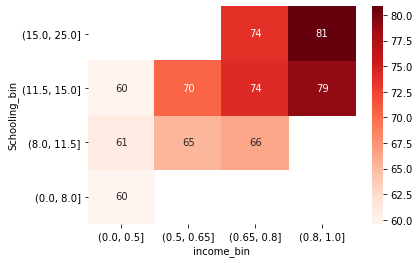

In [107]:
sns.heatmap(gr.unstack(),annot=True,cmap='Reds').invert_yaxis()

* Will the legalization of cannabis for medical use improve life expectancy? 
* Or will the legalization of cannabis for recreational use reduce the crime rate and so improve life expectancy?

In [113]:
life_expectancy.groupby(['Cannabis_Recreational','Cannabis_Medical']).\
agg({'life_expectancy':"mean", "Crime_Index":"mean"})

life_expectancy  Crime_Index
Cannabis_Recreational Cannabis_Medical                              
0                     0                       66.817419    46.436817
                      1                       72.456771    41.419843
1                     0                       74.007987    43.511194
                      1                       77.953274    44.664492

In [116]:
pd.cut(life_expectancy['Crime_Index'], 7)

0        (73.527, 83.76]
1        (73.527, 83.76]
2        (73.527, 83.76]
3        (73.527, 83.76]
4        (73.527, 83.76]
              ...       
2861    (53.061, 63.294]
2862    (53.061, 63.294]
2863    (53.061, 63.294]
2864    (53.061, 63.294]
2865    (53.061, 63.294]
Name: Crime_Index, Length: 2834, dtype: category
Categories (7, interval[float64]): [(12.058, 22.363] < (22.363, 32.596] < (32.596, 42.829] < (42.829, 53.061] < (53.061, 63.294] < (63.294, 73.527] < (73.527, 83.76]]

In [122]:
life_expectancy['crimeBin'] = pd.cut(life_expectancy['Crime_Index'], bins=[0,25,35,45,55,65,75,85,100])

C:\Users\NiNi\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


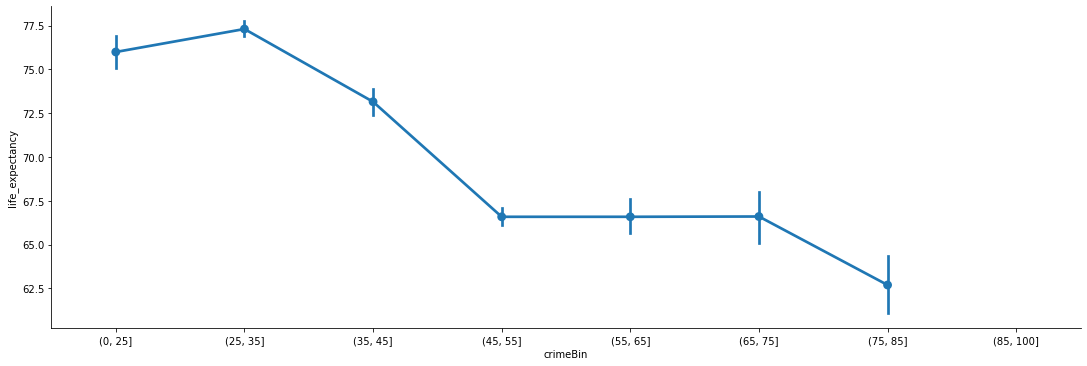

In [123]:
sns.factorplot(x='crimeBin',y='life_expectancy', data=life_expectancy,\
              aspect=3)